## Machine Failure Multiclassification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Analysis

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPCV/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df['Product ID'].value_counts()

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64

In [ ]:
df['Type'].value_counts()
Outlier_df = df[df['Type'] == 'L']
Outlier_df = Outlier_df.drop(['Product ID','UDI','Type'],axis=1)

In [ ]:
df=df.drop(['Product ID','UDI','Type'],axis=1)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure
9996,298.9,308.4,1632,31.8,17,0,No Failure
9997,299.0,308.6,1645,33.4,22,0,No Failure
9998,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [ ]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [ ]:
df['Tool wear [min]'].value_counts()

0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: Tool wear [min], Length: 246, dtype: int64

## EDA(Exploratory Data Analysis)

<Figure size 600x400 with 0 Axes>

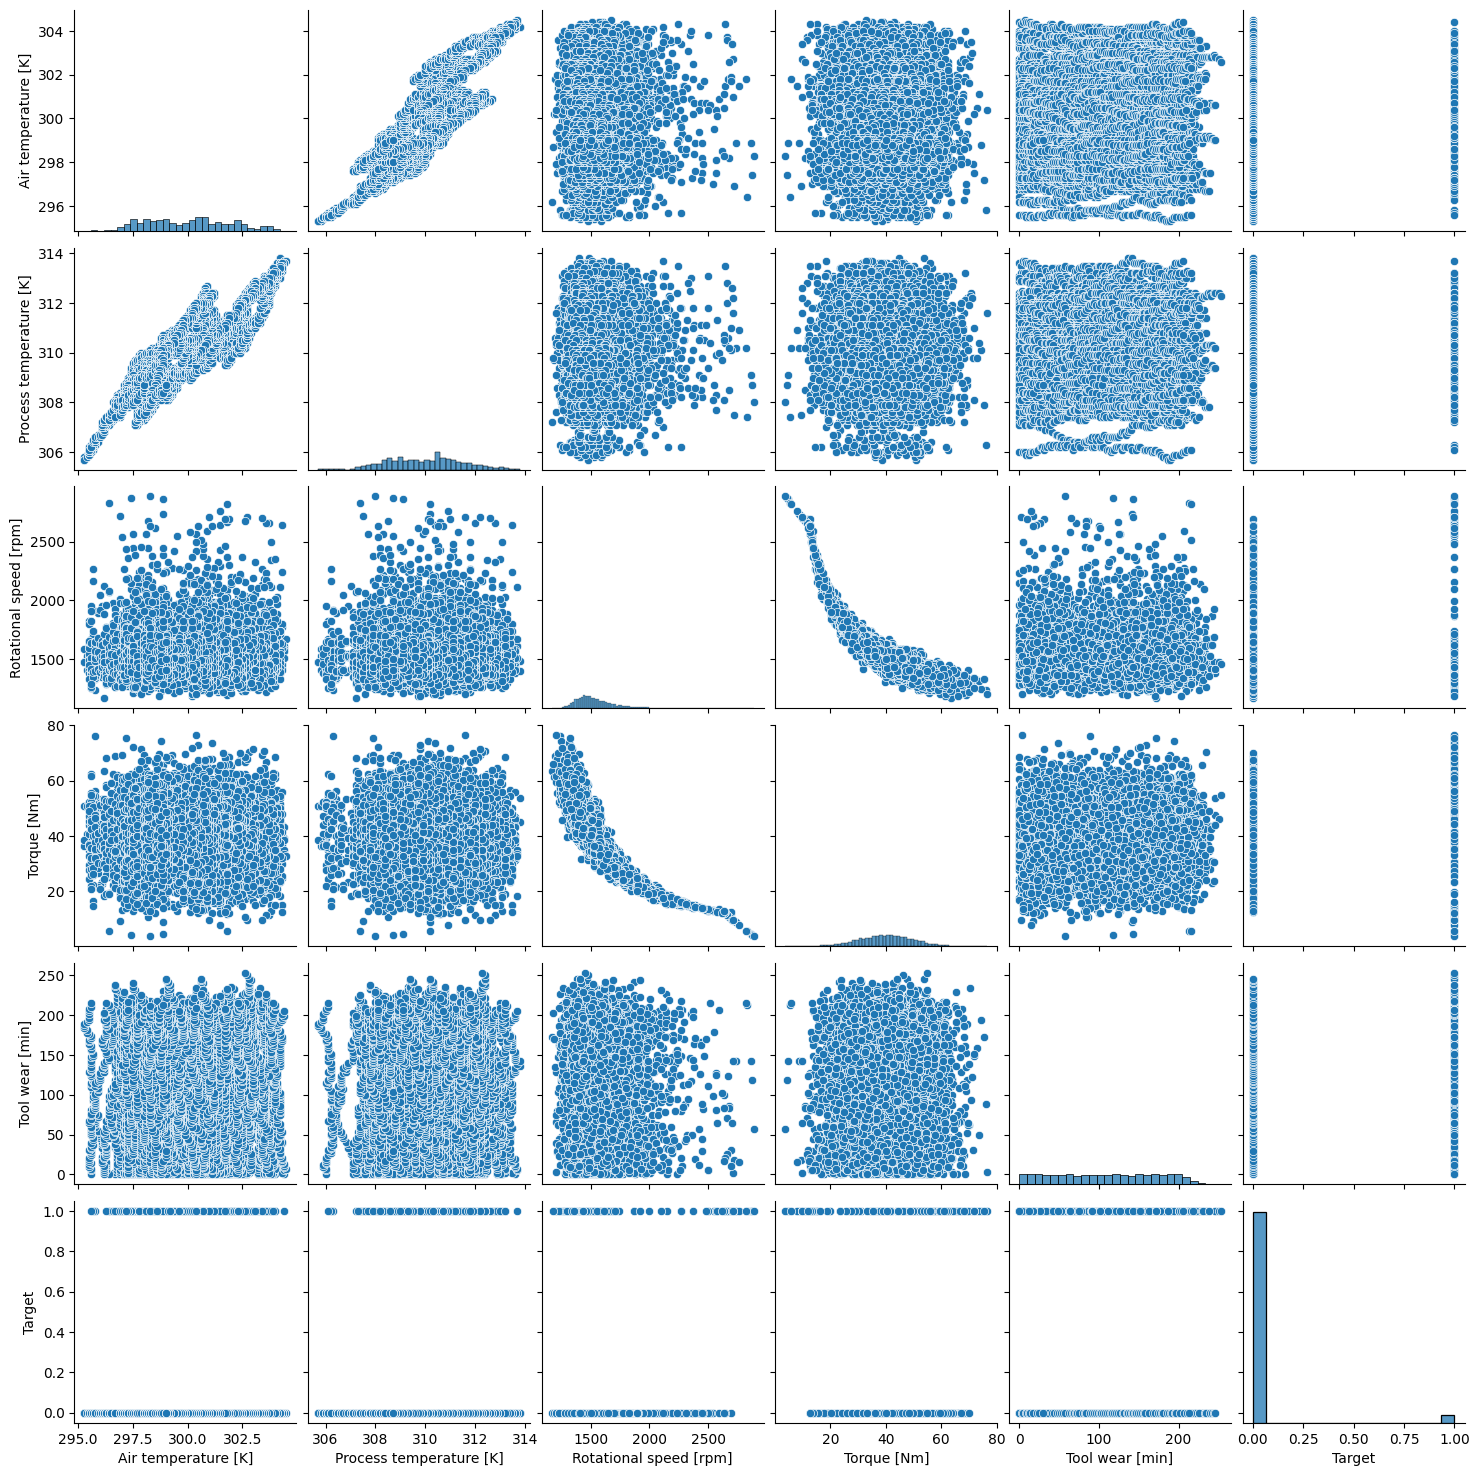

In [ ]:
plt.figure(figsize=(6,4))
sns.pairplot(data=df)

We can see target feature is heavily imbalanced which will make it very chanllenging to train the model on the Failure Types that rarley occurred.

<Axes: xlabel='Failure Type', ylabel='count'>

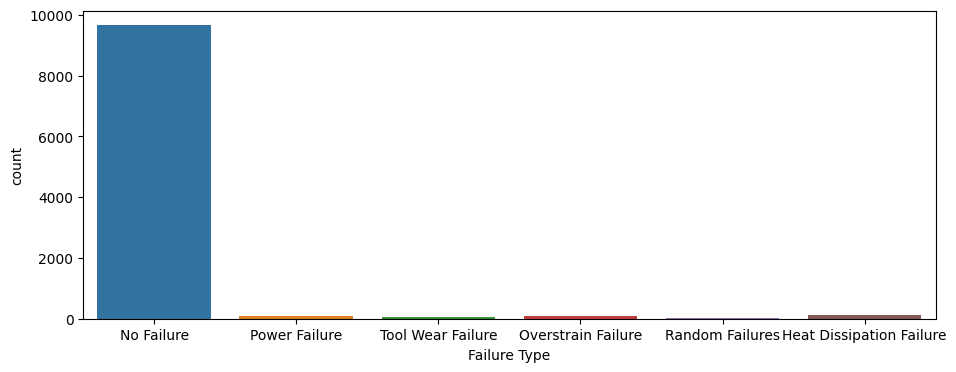

In [ ]:
plt.figure(figsize=(11,4))
label_fontsize = 5
sns.countplot( data=df, x='Failure Type')

Exploring realtionship betwen numerical feaures and the target.

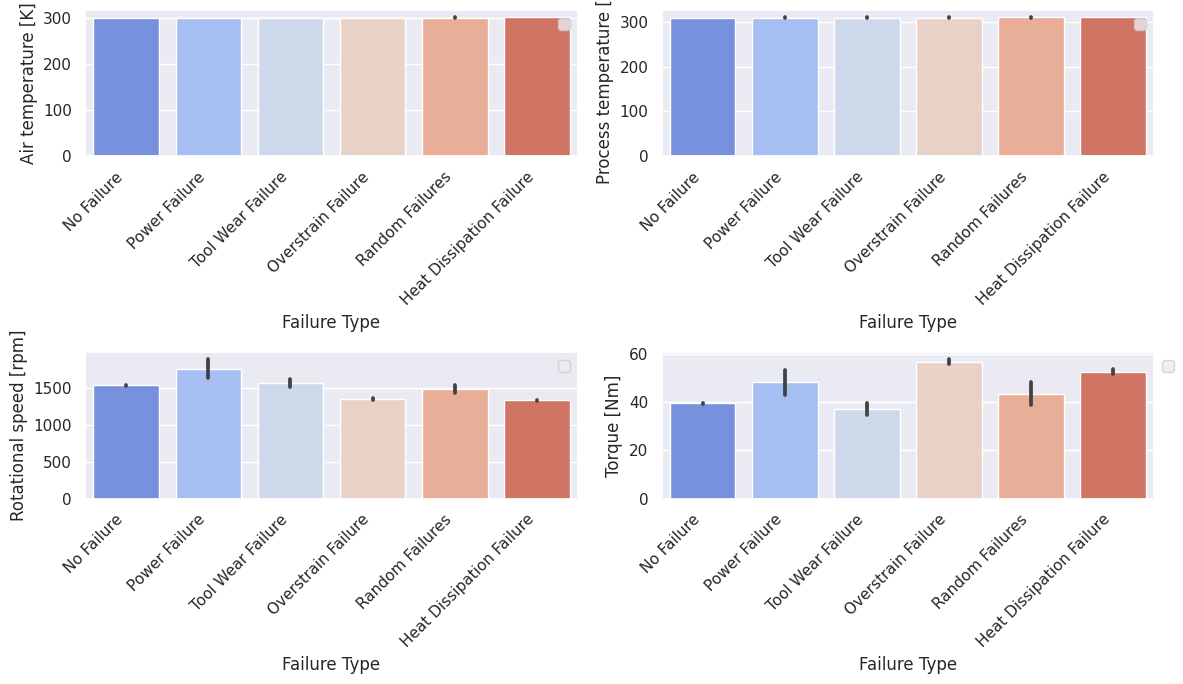

In [ ]:
sns.set(style="darkgrid")
label_fontsize = 4

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.barplot(data=df,x="Failure Type", y="Air temperature [K]", palette="coolwarm",ax=axes[0,0])
axes[0,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df,x="Failure Type", y="Process temperature [K]", palette="coolwarm",ax=axes[0,1])
axes[0,1].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df,x="Failure Type", y="Rotational speed [rpm]", palette="coolwarm",ax=axes[1,0])
axes[1,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df,x="Failure Type", y="Torque [Nm]", palette="coolwarm",ax=axes[1,1])
axes[1,1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()


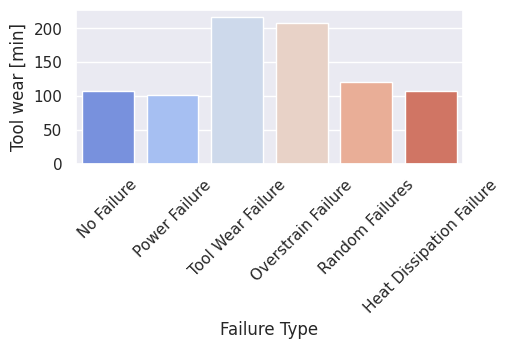

In [ ]:
sns.set(style="darkgrid")
label_fontsize = 4

plt.figure(figsize=(5,2))

sns.barplot(data=df,x="Failure Type", y="Tool wear [min]",errorbar=None, palette="coolwarm")

plt.xticks(rotation=45)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


Let's look at distributions of the numerical features. Mostly looks normal or close to normal.

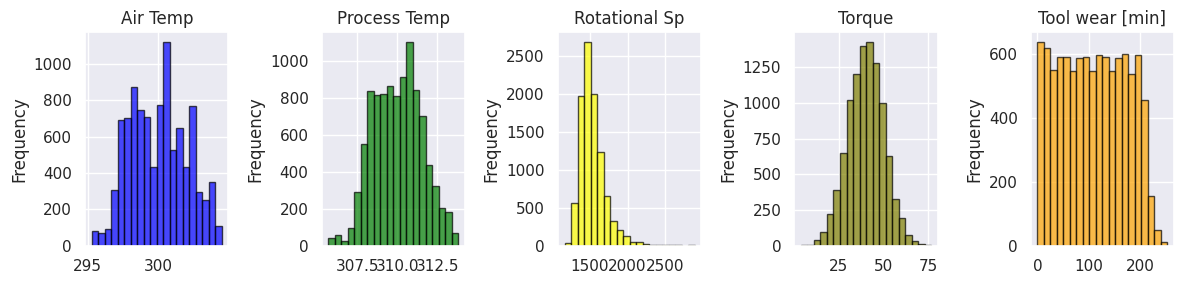

In [ ]:
# Histogram for Air Temp
plt.figure(figsize=(12,3))

plt.subplot(1, 5, 1)
plt.hist(df['Air temperature [K]'], color='blue',bins=20, edgecolor='black', alpha=0.7)
plt.title('Air Temp')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Process Temp
plt.subplot(1, 5, 2)
plt.hist(df['Process temperature [K]'],bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Process Temp')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Rotational Speed
plt.subplot(1, 5, 3)
plt.hist(df['Rotational speed [rpm]'], bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Rotational Sp')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Torque
plt.subplot(1, 5, 4)
plt.hist(df['Torque [Nm]'], bins=20, color='olive', edgecolor='black', alpha=0.7)
plt.title('Torque')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Torque
plt.subplot(1, 5, 5)
plt.hist(df['Tool wear [min]'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Tool wear [min]')
plt.ylabel('Frequency')
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek

## FEATURE ENGINEERING

Label encoding the target so we can apply SMOTETomek

In [ ]:
label_encoder = LabelEncoder()
df['Failure Type_encoded'] = label_encoder.fit_transform(df['Failure Type'])
df['Failure Type_encoded'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type_encoded, dtype: int64

In [ ]:
category_mapping = label_encoder.classes_
category_mapping

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

One hot encoding Type column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
 7   Failure Type_encoded     10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


Reviewing Correlation between numerical features and the target

<Axes: >

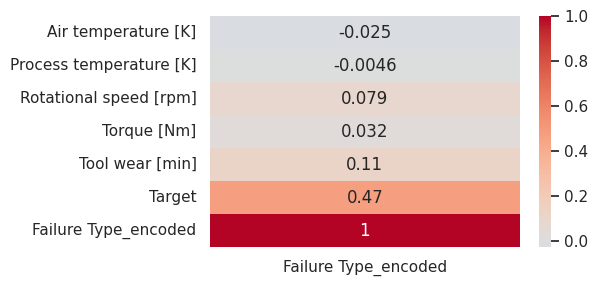

In [ ]:
numeric_columns = df.select_dtypes(include=['float64','int64','int32'])

correlation_matrix = numeric_columns.corr()

corrfinal = correlation_matrix['Failure Type_encoded'].to_frame()

plt.figure(figsize=(5, 3))
sns.heatmap(corrfinal, annot=True, cmap='coolwarm', center=0)

## MODEL Prep - Train Test Split and Balancing

Applying SMOTETomek and a visual of before/after

Class distribution before balancing:
1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type_encoded, dtype: int64

Class distribution after balancing:
2    6749
0    6747
5    6741
3    6740
4    6727
1    6708
Name: Failure Type_encoded, dtype: int64


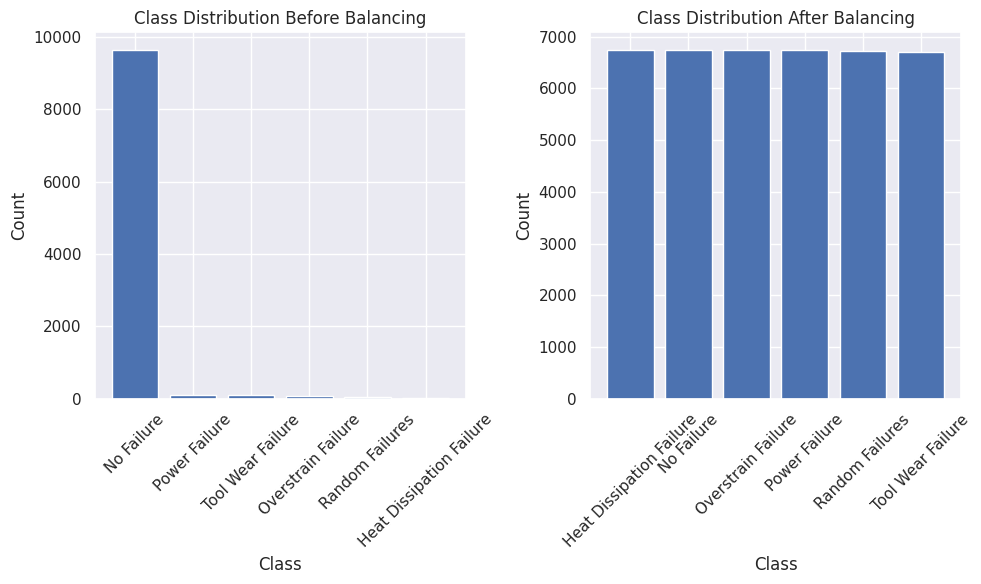

In [ ]:
# Define features and target
X = df.drop(['Failure Type','Target','Failure Type_encoded'], axis=1)
y = df['Failure Type_encoded'].values
Z = df["Target"]

column_names = X.columns.tolist()
X.values
# Split data into train, validation, and test
X_train, X_test, y_train, y_test, Z_train , Z_test = train_test_split(X, y, Z, test_size=0.3, random_state=42)

# Count the original class distribution
print("Class distribution before balancing:")
print(df['Failure Type_encoded'].value_counts())

smt=SMOTETomek(sampling_strategy='auto',random_state=42)

X_trainresampled, y_trainresampled = smt.fit_resample(X_train, y_train)

# Convert the resampled dataset to a DataFrame
df_resampled = pd.DataFrame(X_trainresampled, columns=[f'{i}' for i in column_names])
df_resampled['Failure Type_encoded'] = y_trainresampled

# Count the class distribution after balancing
print("\nClass distribution after balancing:")
print(df_resampled['Failure Type_encoded'].value_counts())

#Visualize the class distribution before and after balancing
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(df['Failure Type'].unique(), df['Failure Type'].value_counts())
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(category_mapping, df_resampled['Failure Type_encoded'].value_counts())
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Scaling

In [ ]:
Z_train = np.where(np.isin(y_trainresampled, [0, 2,5]), -1, y_trainresampled)
Z_train = np.where(np.isin(Z_train, [ 3,4]), -1, Z_train)
Z_test = Z_test.replace({0: 1, 1: -1})

In [ ]:
np.unique(Z_test)

array([-1,  1])

In [ ]:
df_resampled.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type_encoded
0,297.2,308.2,1678,28.1,133,1
1,299.3,309.2,1334,46.3,31,1
2,300.5,312.0,1263,60.8,146,1
3,298.3,308.3,1444,43.8,176,1
4,303.9,312.9,1526,42.5,194,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data after SMOTETomek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainresampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled[1:5]

array([[ 1.68056727,  1.21690396, -0.26679856, -0.13466268, -0.48575566],
       [-1.25465094, -1.87796915, -0.06677646, -0.32783606, -0.26499078],
       [ 1.51442284,  0.82012536,  0.26763551, -0.90045714, -1.68616467],
       [ 1.01598956,  0.10592387,  1.12085481, -1.57656396, -0.09941712]])

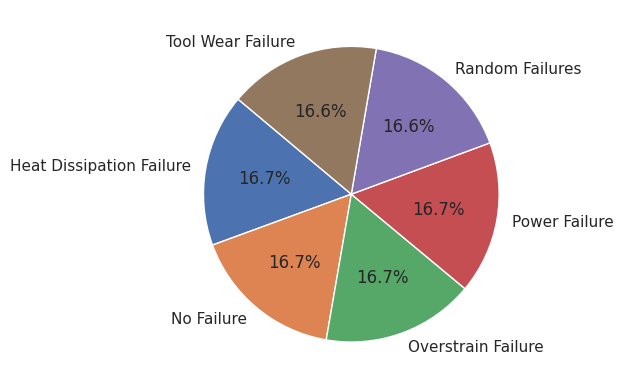

In [ ]:
# The Percentage of records in each of the six  Failure classes
value_counts = df_resampled["Failure Type_encoded"].value_counts()
plt.pie(value_counts, labels=category_mapping, autopct='%1.1f%%', startangle=140)
plt.show()


## MODEL TRAINING AND EVALUATION


---


1) Predictive Maintenance Multiclassification


Train and Test Random Forest and XGB Boost.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train_scaled, y_trainresampled)

predictionstest_rfc = rfc.predict(X_test_scaled)

print(classification_report(y_test,predictionstest_rfc))
print(confusion_matrix(y_test,predictionstest_rfc))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76        23
           1       0.99      0.96      0.98      2903
           2       0.56      0.64      0.60        22
           3       0.65      0.77      0.71        31
           4       0.04      0.14      0.06         7
           5       0.12      0.50      0.20        14

    accuracy                           0.95      3000
   macro avg       0.50      0.65      0.55      3000
weighted avg       0.98      0.95      0.96      3000

[[  21    2    0    0    0    0]
 [  11 2797    9   12   27   47]
 [   0    6   14    1    0    1]
 [   0    6    1   24    0    0]
 [   0    5    0    0    1    1]
 [   0    6    1    0    0    7]]


In [ ]:
import xgboost as xgb

xgbmodel=xgb.XGBClassifier(objective='multi:softmax', num_class=6,random_state=42)

xgbmodel.fit(X_train_scaled, y_trainresampled)

predictionstest_xgb = xgbmodel.predict(X_test_scaled)

print(classification_report(y_test,predictionstest_xgb))
print(confusion_matrix(y_test,predictionstest_xgb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.99      0.97      0.98      2903
           2       0.67      0.64      0.65        22
           3       0.76      0.90      0.82        31
           4       0.03      0.14      0.05         7
           5       0.08      0.29      0.12        14

    accuracy                           0.96      3000
   macro avg       0.57      0.65      0.59      3000
weighted avg       0.98      0.96      0.97      3000

[[  22    1    0    0    0    0]
 [   1 2811    6    9   31   45]
 [   0    7   14    0    0    1]
 [   1    2    0   28    0    0]
 [   0    5    0    0    1    1]
 [   0    9    1    0    0    4]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#One Class SVM
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.09, kernel="rbf", gamma="scale")
svm.fit(X_train,Z_train)

predictionstest_ocsvm = svm.predict(X_test)

outliers = X_test_scaled[predictionstest_ocsvm == -1]
outlier_indices = np.where(predictionstest_ocsvm  == -1)[0]
outlier_actual = y_test[outlier_indices]


num_outliers = len(outliers)
outlier_percentage = (num_outliers / len(Z_test)) * 100

print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

print(classification_report(Z_test,predictionstest_ocsvm))
print(confusion_matrix(Z_test,predictionstest_ocsvm))

Number of outliers: 241
Percentage of outliers: 8.03%
              precision    recall  f1-score   support

          -1       0.15      0.38      0.21        93
           1       0.98      0.93      0.95      2907

    accuracy                           0.91      3000
   macro avg       0.56      0.65      0.58      3000
weighted avg       0.95      0.91      0.93      3000

[[  35   58]
 [ 206 2701]]


In [ ]:
#Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

lof_model = LocalOutlierFactor(n_neighbors=11, contamination=0.1,novelty=True)
lof_model.fit(X_train_scaled,Z_train)

predictionstest_lof = lof_model.predict(X_test_scaled)

outliers = X_test_scaled[predictionstest_lof == -1]
outlier_indices = np.where(predictionstest_lof == -1)[0]
outlier_actual = y_test[outlier_indices]


num_outliers = len(outliers)
outlier_percentage = (num_outliers / len(Z_test)) * 100

print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

print(classification_report(Z_test,predictionstest_lof))
print(confusion_matrix(Z_test,predictionstest_lof))

Number of outliers: 880
Percentage of outliers: 29.33%
              precision    recall  f1-score   support

          -1       0.08      0.74      0.14        93
           1       0.99      0.72      0.83      2907

    accuracy                           0.72      3000
   macro avg       0.53      0.73      0.49      3000
weighted avg       0.96      0.72      0.81      3000

[[  69   24]
 [ 811 2096]]


## MODEL COMPARISON

We see that XGB does a better job overall classifying the minority target classes. This is not easy to see if you look at overall comparison scores below because the minority target classes are such a small percentage of the overall majority class. Confusion Matrix and Class reports of both models provide further detail on classification performance on each target class.

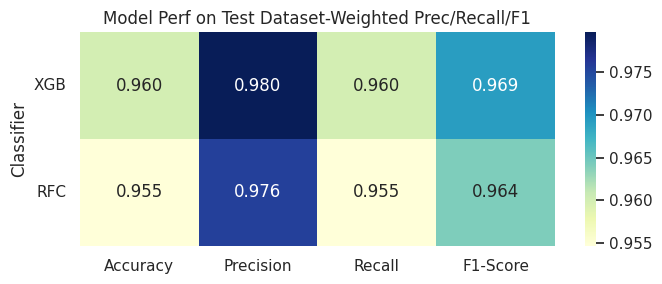

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

#XG Boost
accuracy = accuracy_score(y_test, predictionstest_xgb)
precision = precision_score(y_test, predictionstest_xgb,average='weighted')
recall = recall_score(y_test, predictionstest_xgb,average='weighted')
f1 = f1_score(y_test, predictionstest_xgb,average='weighted')
results.append(["XGB", accuracy, precision, recall, f1])

#Random Forest
accuracy = accuracy_score(y_test, predictionstest_rfc)
precision = precision_score(y_test, predictionstest_rfc,average='weighted')
recall = recall_score(y_test, predictionstest_rfc,average='weighted')
f1 = f1_score(y_test, predictionstest_rfc,average='weighted')
results.append(["RFC", accuracy, precision, recall, f1])


# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

# Sort the DataFrame by F1-Score in descending order
results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Create a heatmap to compare metrics
plt.figure(figsize=(7, 3))
sns.heatmap(results_df.set_index("Classifier"), annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=["Accuracy", "Precision", "Recall", "F1-Score"])
plt.title("Model Perf on Test Dataset-Weighted Prec/Recall/F1")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

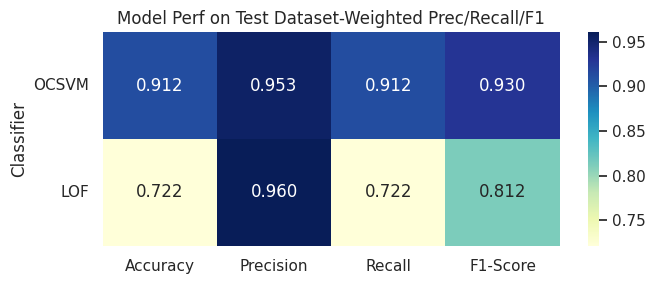

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

#Local Outlier Factor
accuracy = accuracy_score(Z_test, predictionstest_lof)
precision = precision_score(Z_test, predictionstest_lof,average='weighted')
recall = recall_score(Z_test, predictionstest_lof,average='weighted')
f1 = f1_score(Z_test, predictionstest_lof,average='weighted')
results.append(["LOF", accuracy, precision, recall, f1])

#One Class SVM
accuracy = accuracy_score(Z_test, predictionstest_ocsvm)
precision = precision_score(Z_test, predictionstest_ocsvm,average='weighted')
recall = recall_score(Z_test, predictionstest_ocsvm,average='weighted')
f1 = f1_score(Z_test, predictionstest_ocsvm,average='weighted')
results.append(["OCSVM", accuracy, precision, recall, f1])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

# Sort the DataFrame by F1-Score in descending order
results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Create a heatmap to compare metrics
plt.figure(figsize=(7, 3))
sns.heatmap(results_df.set_index("Classifier"), annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=["Accuracy", "Precision", "Recall", "F1-Score"])
plt.title("Model Perf on Test Dataset-Weighted Prec/Recall/F1")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## PLOTTING FEATURE IMPORTANCE

Explainable AI

In [ ]:
!pip install shap

In [ ]:
import shap

[10:41:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[10:41:32] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


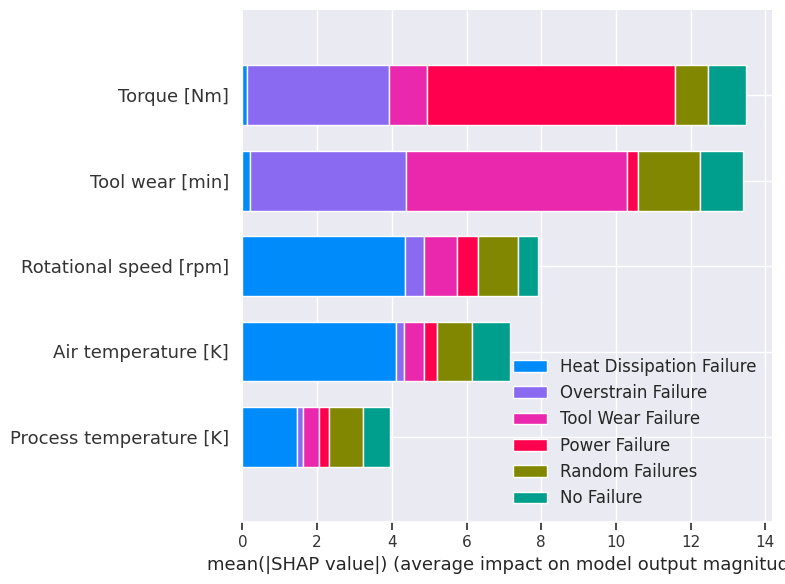

In [ ]:
explainer = shap.Explainer(xgbmodel)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_train_scaled, feature_names=column_names, class_names=category_mapping,plot_size = [8,6])

In [ ]:
explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_train_scaled, feature_names=column_names, class_names=category_mapping,plot_size = [13,5],plot_type='bar', orient='vertical')